# Cat vs. Dog Image Classification
## Part 2

## Data Augmentation



In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [12]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [13]:
import os

base_dir = '../../..//cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255, rotation_range=60,
                                width_shift_range=.2,
                                height_shift_range=.2,
                                 shear_range=.2,
                                 horizontal_flip=True,
                                 zoom_range=.2
                                )
test_datagen=ImageDataGenerator(rescale=1/255, rotation_range=60,
                                width_shift_range=.3,
                                height_shift_range=.3,
                                horizontal_flip=True,
                                 zoom_range=.2
                                )

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                                  batch_size=20, class_mode='binary')

test_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                                  batch_size=50, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


These are just a few of the options available (for more, see the [Keras documentation](https://keras.io/preprocessing/image/). Let's quickly go over what we just wrote:

- `rotation_range` is a value in degrees (0–180), a range within which to randomly rotate pictures.
- `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- `shear_range` is for randomly applying shearing transformations.
- `zoom_range` is for randomly zooming inside pictures.
- `horizontal_flip` is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
- `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


In [29]:
train_cats_dir

'../../..//cats_and_dogs_filtered/cats_and_dogs_filtered\\train\\cats'

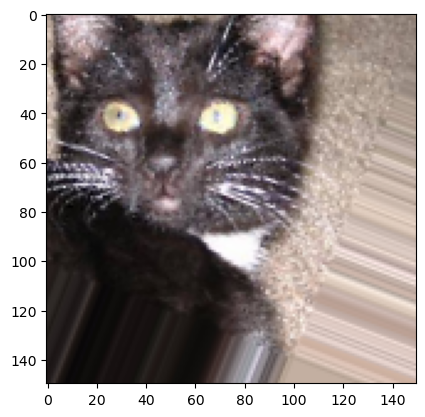

In [30]:
img_path=os.path.join(train_cats_dir,train_cat_fnames[5])
img=load_img(img_path,target_size=(150,150))
x=img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0

for batch in train_datagen.flow(x,batch_size=1):
    plt.figure(1)
    imgplot=plt.imshow(array_to_img(batch[0]))
    i+=1
    if i % 5 ==0:
        break
    

In [31]:
from tensorflow.keras import layers
from tensorflow import keras

In [32]:
img_input=layers.Input(shape=(150,150,3))

x=layers.Conv2D(16,3,activation='relu')(img_input)#relu-normalizacja
x=layers.MaxPool2D()(x)

x=layers.Conv2D(32,3,activation='relu')(x)#relu-normalizacja
x=layers.MaxPool2D()(x)

x=layers.Conv2D(64,3,activation='relu')(x)#relu-normalizacja
x=layers.MaxPool2D()(x)

In [33]:
x=layers.Flatten()(x)
x=layers.Dense(512, activation='relu')(x)
output=layers.Dense(1,activation='sigmoid')(x)

model=keras.Model(img_input,output)

In [34]:
model.summary() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

In [42]:
model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.RMSprop(),
             metrics=['accuracy'])

In [43]:
history=model.fit(train_generator,  # jak klikne kilka razy to sie douczy, nie startuje od zera
                 epochs=15,
                 validation_data=test_generator,
                 workers=4) # workeryszybciej

Epoch 1/15
100/100 [==============================] - 10s 91ms/step - loss: 0.5364 - accuracy: 0.7300 - val_loss: 0.5827 - val_accuracy: 0.6840
Epoch 2/15
100/100 [==============================] - 9s 87ms/step - loss: 0.5133 - accuracy: 0.7470 - val_loss: 0.5613 - val_accuracy: 0.7040
Epoch 3/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5109 - accuracy: 0.7430 - val_loss: 0.6058 - val_accuracy: 0.6940
Epoch 4/15
100/100 [==============================] - 9s 88ms/step - loss: 0.5163 - accuracy: 0.7450 - val_loss: 0.5638 - val_accuracy: 0.7100
Epoch 5/15
100/100 [==============================] - 9s 84ms/step - loss: 0.5055 - accuracy: 0.7565 - val_loss: 0.5651 - val_accuracy: 0.7170
Epoch 6/15
100/100 [==============================] - 9s 87ms/step - loss: 0.5112 - accuracy: 0.7610 - val_loss: 0.6113 - val_accuracy: 0.6910
Epoch 7/15
100/100 [==============================] - 9s 85ms/step - loss: 0.4997 - accuracy: 0.7485 - val_loss: 0.5831 - val_accuracy: 0.698

In [48]:
y_test=test_generator.labels

In [46]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [51]:
import numpy as np

In [53]:
y_test_prob=model.predict(test_generator)

20/20 [==============================] - 8s 405ms/step


In [54]:
np.where(y_test_prob>.5,1,0)

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
    

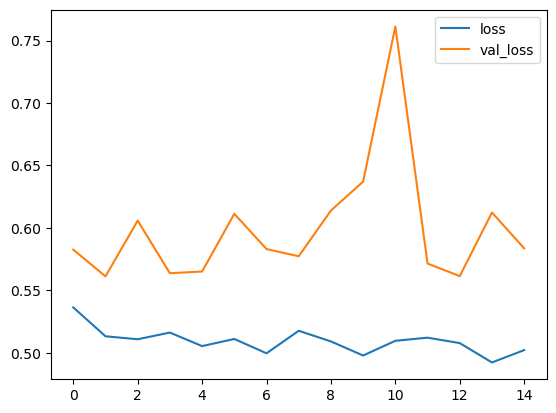

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss']);
